In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
from scipy.stats import entropy
import glob
import sys
sys.path.append('../')
from package_global_functions import *

def get_avg_traj(dfs):
    df_avg = reduce(lambda a,b: a.add(b, fill_value=0), dfs)
    df_avg = df_avg/len(dfs)
    return df_avg

path_kb_data = '../../kilobot_experiments_data/BeesModel_N=35_ordered'

### Read, avg  and plot some evolutions:

In [13]:
filep1 = 'BeesModel_N=35_deltat=0800_f0static_p1=30_p2=30_q1=07_q2=10_lambda=00_rep=01-results.csv'
df1 = pd.read_csv(f'{path_kb_data}/{filep1}')
filep2 = 'BeesModel_N=35_deltat=0800_f0static_p1=30_p2=30_q1=07_q2=10_lambda=00_rep=02-results.csv'
df2 = pd.read_csv(f'{path_kb_data}/{filep2}')

for df in [df1, df2]:
    df['sum'] = df['R'] + df['G'] + df['B']
    df['f2'] = df['B']/df['sum']
    df['f1'] = df['G']/df['sum']
    df['f0'] = df['R']/df['sum']
    df = df.drop(labels=['file', 'R', 'G', 'B', 'correct', 'sum'], axis=1, inplace=True)

dfavg = get_avg_traj([df1, df2])
print(len(df1), len(df2), len(dfavg))
fig, ax = plt.subplots()
cicles = np.arange(1,len(df1)+1,1)
ax.plot(cicles, df1['f2'], lw=0.8, color='xkcd:blue')
ax.plot(cicles, df2['f2'], lw=0.8, color='xkcd:blue', ls=':')
ax.plot(cicles, dfavg['f2'], lw=0.8, color='xkcd:blue', ls='--')


### Identify files and save to a dataframe

In [102]:
files = glob.glob(f'{path_kb_data}/*.csv')

ls = []
pi1s = []
pi2s = []

for file in files:
    pi1int = int(file.split('_')[8].split('=')[1])
    pi2int = int(file.split('_')[9].split('=')[1])
    lint = int(file.split('_')[12].split('=')[1])
    # print(pi1int, pi2int, lint)  
    pi1s.append(pi1int), pi2s.append(pi2int), ls.append(lint)

df = pd.DataFrame({'file':files, 'lamb':ls, 'pi1':pi1s, 'pi2':pi2s})

df.to_csv('files_kb_N_35.csv', index=False)

In [118]:
pi_pairs = [(30, 30), (40, 20)]
lambs = [0, 30, 60, 90]
# lambs = [0, ]
states_df = {'pi1':[], 'pi2':[], 'lamb':[]} # 'Qavg':[]
states_ids = ['Qf2', 'qf2', 'draw', 'qf1', 'Qf1']
for sid in states_ids:
    states_df[sid] = []

dffiles = pd.read_csv('files_kb_N_35.csv')

for pi_pair in pi_pairs:
    pi1, pi2 = pi_pair
    for l in lambs:
        states = [0, 0, 0, 0, 0] # [f2 > 2*f1, f2 > f1, f2 == f2, f1 > f2, f1 > 2*f2]
        prevsum = 0
        Qavg = 0
        dfa = dffiles.query('lamb == @l & pi1 == @pi1 & pi2 == @pi2')
        for f in dfa['file']:
            dfi = pd.read_csv(f)
            if (len(dfi) < 100):
                print(f)
            dfi['sum'] = dfi['R'] + dfi['G'] + dfi['B']
            dfi['f2'] = dfi['B']/dfi['sum']
            dfi['f1'] = dfi['G']/dfi['sum']
            dfi['f0'] = dfi['R']/dfi['sum']
            dfi['Q'] = dfi['f2'] - 2*dfi['f1']
            dfi = dfi.drop(labels=['file', 'R', 'G', 'B', 'correct', 'sum'], axis=1)
            for row in dfi[50:].itertuples():
                f2, f1 = row[1], row[2]
                if f2 > 2*f1:
                    states[0] += 1
                elif f2 > f1:
                    states[1] += 1
                elif f2 == f1:
                    states[2] += 1
                elif f1 > 2*f1:
                    states[4] += 1
                elif f1 > f2:
                    states[3] += 1
            # if len(dfi[50:]) == (sum(states) - prevsum):
            #     # continue
            #     print('godood')
            # else:
            #     print('errorrrr')
            #     print(len(dfi[50:]), sum(states)-prevsum)
            if not len(dfi[50:]) == (sum(states) - prevsum):
                print('errorrrr')
            prevsum = sum(states)
            # Qavg += np.average(dfi[50:]['Q'])
        # Qavg = Qavg/len(dfa)
        states_df['pi1'].append(pi_pair[0]), states_df['pi2'].append(pi_pair[1]), states_df['lamb'].append(l) #, states_df['Qavg'].append(Qavg)
        for i,sid in enumerate(states_ids):
            states_df[sid].append(states[i])

states_df = pd.DataFrame(states_df)
states_df.to_csv('files_kb_N_35_states.csv', index=False)
    

../../kilobot_experiments_data/BeesModel_N=35_ordered/BeesModel_N=35_deltat=0800_f0static_p1=30_p2=30_q1=07_q2=10_lambda=30_rep=02-results.csv
../../kilobot_experiments_data/BeesModel_N=35_ordered/BeesModel_N=35_deltat=0800_f0static_p1=30_p2=30_q1=07_q2=10_lambda=90_rep=03-results.csv


In [ ]:
labels = ['$f_2 > 2f_1$', '$f_2 > f_1$', '$f_2 = f_1$', '$f_1 > f_2$', '$f_2 > 2 f_1$']
fig, ax = plt.subplots()
ax.pie(states, labels=labels, autopct='%1.1f%%')

### fent servir subplots normal

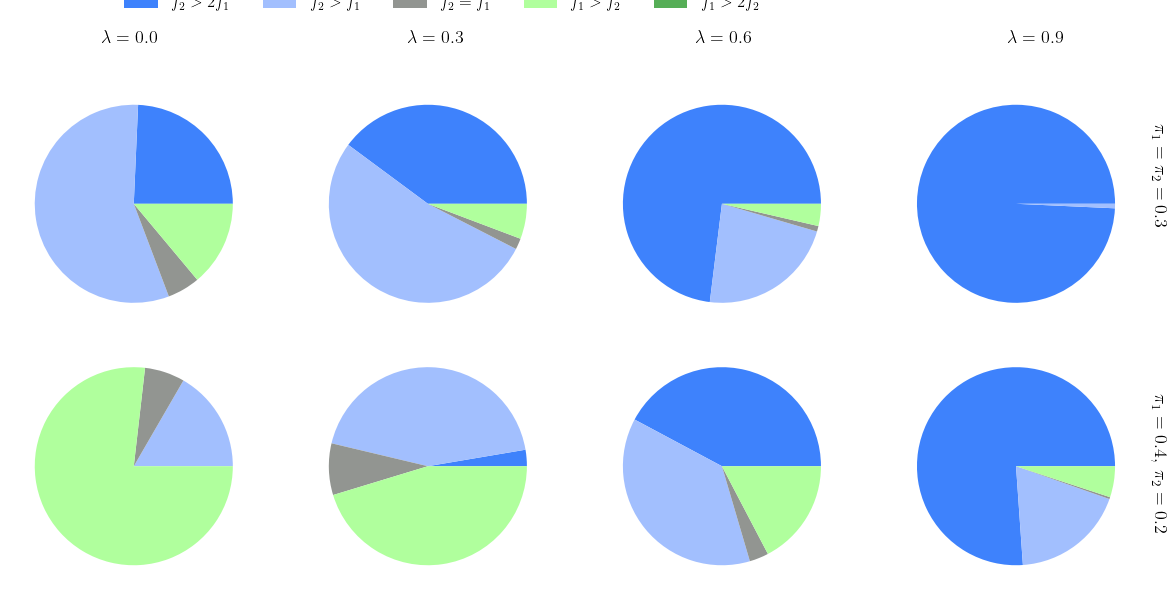

In [12]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13, legendsize=12)

fig, ax = plt.subplots(2,4, figsize=(12,6))
fig.subplots_adjust(left=0.01, right=0.99, bottom=0.05, top=0.90, hspace=0.06, wspace=0.001)

states_ids = ['Qf2', 'qf2', 'draw', 'qf1', 'Qf1']

labels = ['$f_2 > 2f_1$', '$f_2 > f_1$', '$f_2 = f_1$', '$f_1 > f_2$', '$f_1 > 2 f_2$']
# colors = plt.cm.Pastel1(np.linspace(0, 1, len(labels)))
# colors = plt.cm.plasma(np.linspace(0.1, 0.9, len(labels)))

# colors = ['xkcd:bright blue', 'xkcd:sky blue', 'xkcd:gray', 'xkcd:light green', 'xkcd:emerald green']
colors = ['xkcd:dodger blue', 'xkcd:pastel blue', 'xkcd:gray', 'xkcd:pastel green', 'xkcd:dark pastel green']

df_states = pd.read_csv('files_kb_N_35_states.csv')

for i,pi_pair in enumerate([(30, 30), (40, 20)]):
    pi1, pi2 = pi_pair
    for j,l in enumerate([0, 30, 60, 90]):
        dfa = df_states.query('lamb == @l & pi1 == @pi1 & pi2 == @pi2')
        states = [int(dfa[sid].iloc[0]) for sid in states_ids]
        # ax[i,j].pie(states, labels=labels, colors=colors, autopct='%1.1f%%')
        if i == 0 and j == 0:
            # wedges, text, autotexts = ax[i,j].pie(states, colors=colors, autopct='%1.1f%%')
            wedges, text = ax[i,j].pie(states, colors=colors)
        else:
            ax[i,j].pie(states, colors=colors)
        # if i == 0:
        #     ax[i,j].set_title(f'$\lambda = {l/100}$')

fig.legend(wedges, labels, loc=(0.1, 0.97), ncol=5, frameon=False)
# ax[0,0].text(0.5, 1.0, '$\lambda = 0.0$', transform=ax[0,0].transAxes)
fig.text(0.105, 0.96, '$\lambda = 0.0$', fontsize=13)
fig.text(0.36, 0.96, '$\lambda = 0.3$', fontsize=13)
fig.text(0.60, 0.96, '$\lambda = 0.6$', fontsize=13)
fig.text(0.86, 0.96, '$\lambda = 0.9$', fontsize=13)

fig.text(0.98, 0.66, f'$\pi_1 = \pi_2 = 0.3$', fontsize=13, rotation=270)
fig.text(0.98, 0.15, f'$\pi_1 = 0.4, \; \pi_2 = 0.2$', fontsize=13, rotation=270)

fig.savefig('pie_charts_different_states_kb_N_35_stationary.pdf')

### fent servir subplots adjust

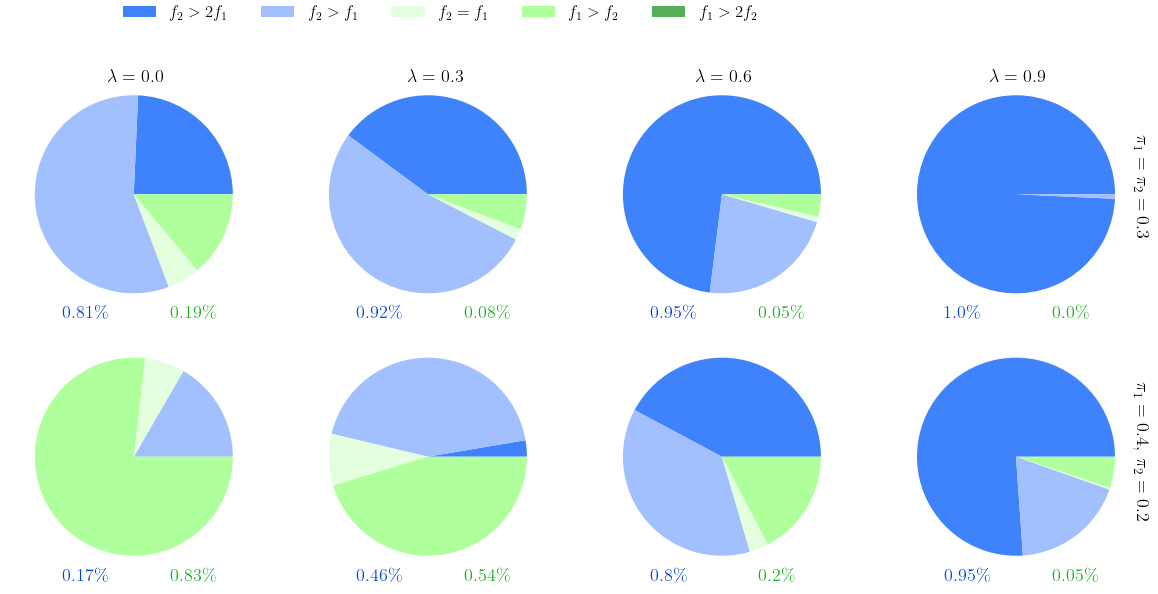

In [39]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13, legendsize=12)

fig, ax = plt.subplots(2,4, figsize=(12,6))
fig.subplots_adjust(left=0.01, right=0.99, bottom=0.05, top=0.90, hspace=0.06, wspace=0.001)

states_ids = ['Qf2', 'qf2', 'draw', 'qf1', 'Qf1']

labels = ['$f_2 > 2f_1$', '$f_2 > f_1$', '$f_2 = f_1$', '$f_1 > f_2$', '$f_1 > 2 f_2$']
# colors = plt.cm.Pastel1(np.linspace(0, 1, len(labels)))
# colors = plt.cm.plasma(np.linspace(0.1, 0.9, len(labels)))

# colors = ['xkcd:bright blue', 'xkcd:sky blue', 'xkcd:gray', 'xkcd:light green', 'xkcd:emerald green']
colors = ['xkcd:dodger blue', 'xkcd:pastel blue', 'xkcd:gray', 'xkcd:pastel green', 'xkcd:dark pastel green']
colors = ['xkcd:dodger blue', 'xkcd:pastel blue', '#e4ffde', 'xkcd:pastel green', 'xkcd:dark pastel green']

df_states = pd.read_csv('files_kb_N_35_states.csv')

for i,pi_pair in enumerate([(30, 30), (40, 20)]):
    pi1, pi2 = pi_pair
    for j,l in enumerate([0, 30, 60, 90]):
        dfa = df_states.query('lamb == @l & pi1 == @pi1 & pi2 == @pi2')
        states = [int(dfa[sid].iloc[0]) for sid in states_ids]
        # ax[i,j].pie(states, labels=labels, colors=colors, autopct='%1.1f%%')
        if i == 0 and j == 0:
            # wedges, text, autotexts = ax[i,j].pie(states, colors=colors, autopct='%1.1f%%')
            wedges, text = ax[i,j].pie(states, colors=colors)
        else:
            ax[i,j].pie(states, colors=colors)
        # if i == 0:
        #     ax[i,j].set_title(f'$\lambda = {l/100}$')
        posis = ax[i,j].get_position()
        op_choice,sop_choice = (states[0]+states[1])/sum(states), (states[2]+states[3]+states[4])/sum(states)
        fig.text((posis.xmax+posis.xmin)/2-0.06, posis.ymin, f'{round(op_choice,2)}\%', color='xkcd:blue', fontsize=13)
        fig.text((posis.xmax+posis.xmin)/2+0.03, posis.ymin, f'{round(sop_choice,2)}\%', color='xkcd:green', fontsize=13)


fig.legend(wedges, labels, loc=(0.1, 0.954), ncol=5, frameon=False)
# ax[0,0].text(0.5, 1.0, '$\lambda = 0.0$', transform=ax[0,0].transAxes)

height_lambda_labels = 0.88
fig.text(0.11, height_lambda_labels, '$\lambda = 0.0$', fontsize=13)
fig.text(0.36, height_lambda_labels, '$\lambda = 0.3$', fontsize=13)
fig.text(0.60, height_lambda_labels, '$\lambda = 0.6$', fontsize=13)
fig.text(0.845, height_lambda_labels, '$\lambda = 0.9$', fontsize=13)

fig.text(0.965, 0.625, f'$\pi_1 = \pi_2 = 0.3$', fontsize=13, rotation=270)
fig.text(0.965, 0.155, f'$\pi_1 = 0.4, \; \pi_2 = 0.2$', fontsize=13, rotation=270)

fig.savefig('pie_charts_different_states_kb_N_35_stationary.pdf')

In [26]:
ax[1,1].get_position().xmin

0.2743140581457111

# Kullback Liebler Divergence of the histograms

In [32]:
from scipy.special import rel_entr

def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

# def kl_divergence(p, q):
#     return np.sum(np.where(q != 0, p * np.log(p / q), 0))

def kl_div_david(p, q):
    kl = 0
    for pf1,pf2 in zip(p[q > 0], q[q > 0]):
            if pf1 > 0.0:
                kl += pf1*np.log(pf1/pf2)
    return kl

# https://mathoverflow.net/questions/72668/how-to-compute-kl-divergence-when-pmf-contains-0s

In [33]:
pi_pairs = [(30, 30), (40, 20)]
lambs = [0, 30, 60, 90]

# pi_pairs = [(30, 30), ]
# lambs = [0, ]
# fig, ax = plt.subplots()

dffiles = pd.read_csv('files_kb_N_35.csv')

kl_div_f2ref_dicc = {}
js_div_dicc = {}

for pi_pair in pi_pairs:
    pi1, pi2 = pi_pair
    kl_div_f2ref_dicc[pi_pair] = []
    js_div_dicc[pi_pair] = []
    for l in lambs:
        dfa = dffiles.query('lamb == @l & pi1 == @pi1 & pi2 == @pi2')
        pool_fs = [[],[]]
        for f in dfa['file']:
            dfi = pd.read_csv(f)
            # if (len(dfi) < 100):
            #     print(f)
            dfi['sum'] = dfi['R'] + dfi['G'] + dfi['B']
            dfi['f2'] = dfi['B']/dfi['sum']
            dfi['f1'] = dfi['G']/dfi['sum']
            dfi['f0'] = dfi['R']/dfi['sum']
            pool_fs[0].extend(list(dfi['f1'][50:])), pool_fs[1].extend(list(dfi['f2'][50:]))
        # compute the histograms:
        # pdf_f1 = hist1D(pool_fs[0], np.linspace(0.0, 1.0, 21))
        pdf_f1, _ = np.histogram(pool_fs[0], bins=20, range=(0,1), density=True)
        pdf_f2, _ = np.histogram(pool_fs[1], bins=20, range=(0,1), density=True)
        # compute the kl divergence:
        # kl_div_f2_v1 = entropy(pdf_f1[pdf_f2 > 0], pdf_f2[pdf_f2 > 0], base=None)
        # kl_div_f2_v2 = sum(rel_entr(pdf_f1[pdf_f2 > 0], pdf_f2[pdf_f2 > 0]))
        kl_div_f2_v3 = kl_div_david(pdf_f1, pdf_f2)
        # kl_div_f2_v4 = kl_divergence(pdf_f1[pdf_f2 > 0], pdf_f2[pdf_f2 > 0])
        # print(kl_div_f2_v1, kl_div_f2_v2, kl_div_f2_v3, kl_div_f2_v4)
        kl_div_f2ref_dicc[pi_pair].append(kl_div_f2_v3)
        # ax.plot(range(len(pdf_f1)), pdf_f1)
        # ax.plot(range(len(pdf_f2)), pdf_f2)
        # compute the jensen-shannon divergence:
        pdf_avg = (pdf_f1 + pdf_f2)/2
        kl_div_auxf1 = kl_div_david(pdf_f1, pdf_avg)
        kl_div_auxf2 = kl_div_david(pdf_f2, pdf_avg)
        print(kl_div_auxf1, kl_div_auxf2)
        js_div = (kl_div_auxf1 + kl_div_auxf2)/2
        js_div_dicc[pi_pair].append(js_div)

5.628549385978575 5.4479930968744545
10.1149804466692 10.116179582026195
12.176003234918442 12.698688527098144
13.862943611198906 13.862943611198906
4.839565182116891 4.976534638173555
0.19625292839384836 0.2414774104395611
6.134457392519097 5.920998514529675
11.955935342191925 11.558684899493745


In [34]:
kl_div_f2ref_dicc

{(30, 30): [21.602420684831987, 58.92926317951439, -1.003251629015443, 0],
 (40, 20): [16.217803427819327,
  0.46822106760793614,
  18.98449070235419,
  10.041169326982487]}

In [35]:
js_div_dicc

{(30, 30): [5.538271241426514,
  10.115580014347698,
  12.437345881008293,
  13.862943611198906],
 (40, 20): [4.908049910145223,
  0.21886516941670475,
  6.027727953524385,
  11.757310120842835]}

In [184]:
pdf_f2

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.26239067, 0.52478134, 0.84548105, 2.33236152, 3.73177843,
       2.74052478, 5.65597668, 3.14868805, 0.64139942, 0.11661808])

In [28]:
pdf_f2

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.15822785, 0.22151899, 0.15822785, 0.75949367, 1.36075949,
       1.67721519, 2.91139241, 1.32911392, 3.29113924, 2.72151899,
       1.26582278, 2.24683544, 1.64556962, 0.25316456, 0.        ])

In [27]:
pdf_avg

array([1.39240506, 1.7721519 , 1.69303797, 0.63291139, 1.40822785,
       1.18670886, 0.91772152, 0.53797468, 0.74367089, 1.02848101,
       0.85443038, 1.4556962 , 0.66455696, 1.64556962, 1.36075949,
       0.63291139, 1.12341772, 0.82278481, 0.12658228, 0.        ])

In [31]:
# kl_div_david(pdf_f2,pdf_avg)
sum(rel_entr(pdf_f2[pdf_avg > 0], pdf_avg[pdf_avg > 0]))

11.558684899493745